In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

import scipy.stats as stat
from collections import Counter

from sklearn.svm import SVC
from tqdm.notebook import tqdm_notebook
from imblearn.over_sampling import SMOTE,  ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold , GridSearchCV, train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report,\
roc_curve, roc_auc_score , recall_score , precision_score, f1_score

In [3]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
salary_train = pd.read_csv('/content/SalaryData_Train(1).csv')
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
salary_test = pd.read_csv('/content/SalaryData_Test(1).csv')
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [6]:
# Merging Train and Test Data
raw_data = salary_train.append(salary_test)
raw_data.reset_index(inplace=True,drop=True)
raw_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45217,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45218,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45219,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


# **DATA EXPLORATION **

In [7]:
print(raw_data.shape)
raw_data.head()

(45221, 14)


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
raw_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,1101.454700,88.548617,40.938038
std,13.217981,2.552909,7506.511295,404.838249,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


In [10]:
raw_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [11]:
raw_data[raw_data.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
45210,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
45213,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
45214,25,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K


In [12]:
raw_data[raw_data.duplicated()].shape

(5982, 14)

In [13]:
# List of Numerical Variables
numerical_features=[feature for feature in raw_data.columns if raw_data[feature].dtypes != 'O']

print('Number of numerical variables:', len(numerical_features))

# Visualize the numerical variables
raw_data[numerical_features].head()

Number of numerical variables: 5


,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


In [14]:
discrete_feature=[feature for feature in numerical_features if len(raw_data[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 1


In [15]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 4


In [16]:
# find categorical variables

categorical = [var for var in raw_data.columns if raw_data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [17]:
# view frequency counts of values in categorical variables

for var in categorical:

    print(raw_data[var].value_counts())

 Private             33306
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64
 HS-grad         14783
 Some-college     9898
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education, dtype: int64
 Married-civ-spouse       21055
 Never-married            14597
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: maritalstatus, dtype: int64
 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical         5540
 Sales           

In [18]:
for var in categorical:

    print(raw_data[var].value_counts()/np.float(len(raw_data)))

 Private             0.736516
 Self-emp-not-inc    0.083943
 Local-gov           0.068552
 State-gov           0.043033
 Self-emp-inc        0.036399
 Federal-gov         0.031092
 Without-pay         0.000464
Name: workclass, dtype: float64
 HS-grad         0.326906
 Some-college    0.218881
 Bachelors       0.167400
 Masters         0.055594
 Assoc-voc       0.043321
 11th            0.035802
 Assoc-acdm      0.033325
 10th            0.027045
 7th-8th         0.018200
 Prof-school     0.017359
 9th             0.014949
 12th            0.012760
 Doctorate       0.012030
 5th-6th         0.009929
 1st-4th         0.004909
 Preschool       0.001592
Name: education, dtype: float64
 Married-civ-spouse       0.465602
 Never-married            0.322793
 Divorced                 0.139249
 Separated                0.031202
 Widowed                  0.028239
 Married-spouse-absent    0.012207
 Married-AF-spouse        0.000708
Name: maritalstatus, dtype: float64
 Craft-repair         0.13312

In [19]:
for var in categorical:

    print(var, ' contains ', len(raw_data[var].unique()), ' labels')

workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native  contains  40  labels
Salary  contains  2  labels


In [20]:
raw_data.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.037623,0.079682,0.059426,0.101992
educationno,0.037623,1.000000,0.126907,0.081741,0.146206
capitalgain,0.079682,0.126907,1.000000,-0.032095,0.083880
capitalloss,0.059426,0.081741,-0.032095,1.000000,0.054220
hoursperweek,0.101992,0.146206,0.083880,0.054220,1.000000


# **Performing EDA**

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'age'),
  Text(1.5, 0, 'educationno'),
  Text(2.5, 0, 'capitalgain'),
  Text(3.5, 0, 'capitalloss'),
  Text(4.5, 0, 'hoursperweek')])

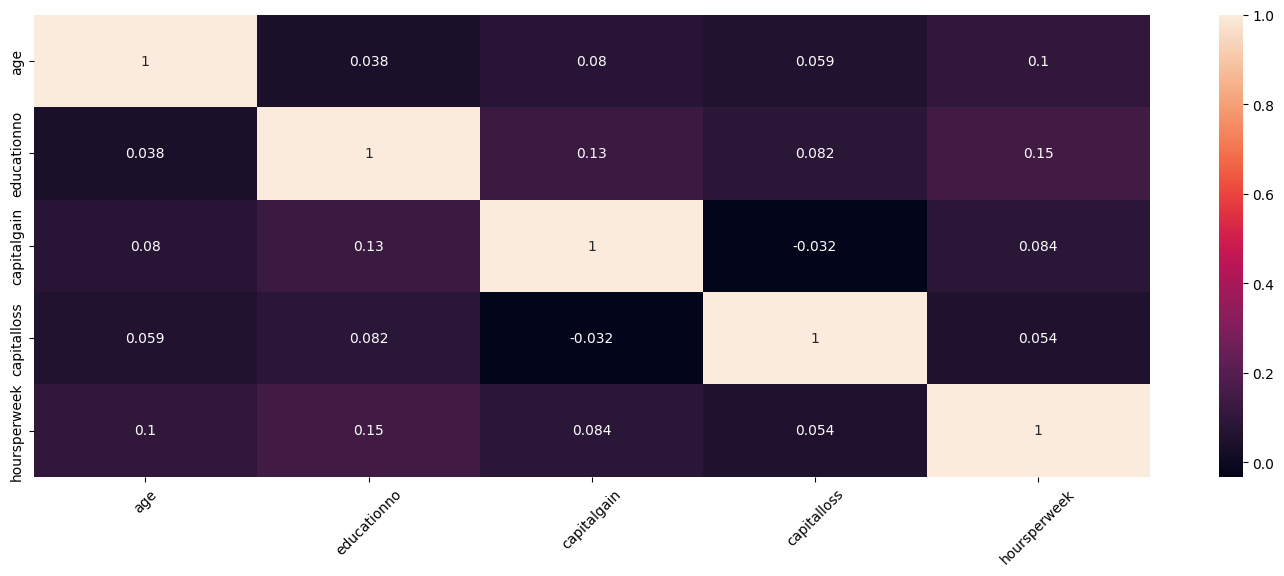

In [21]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(raw_data.corr(), annot=True);
plt.xticks(rotation=45)

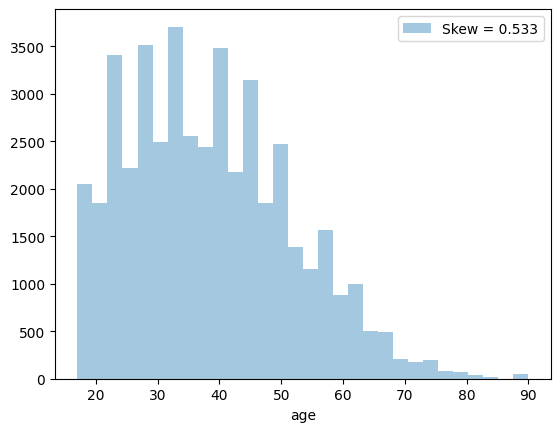

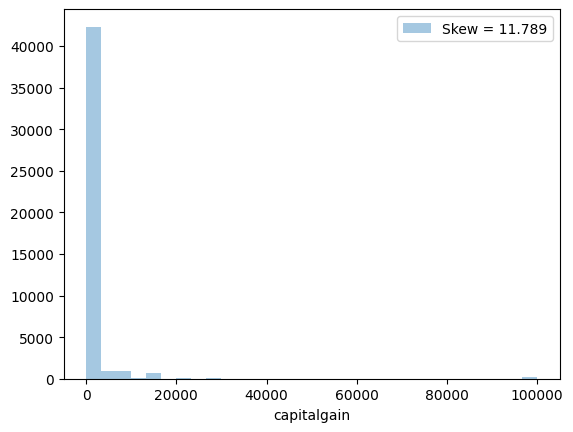

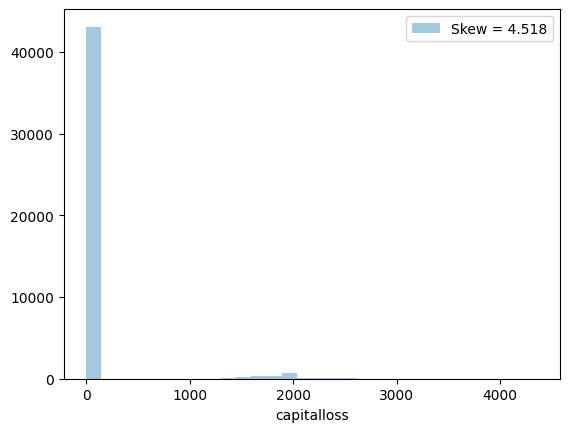

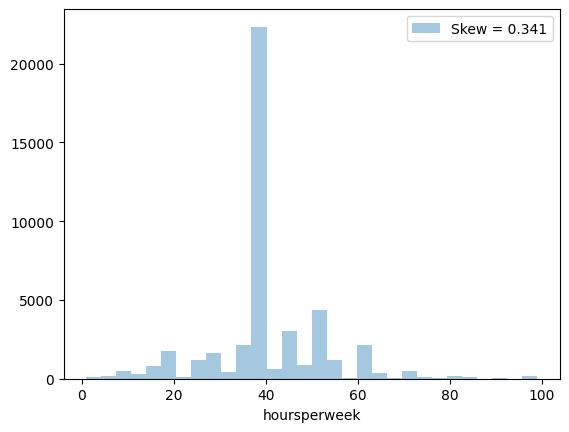

In [22]:
for feat in continuous_feature:
    skew = raw_data[feat].skew()
    sns.distplot(raw_data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

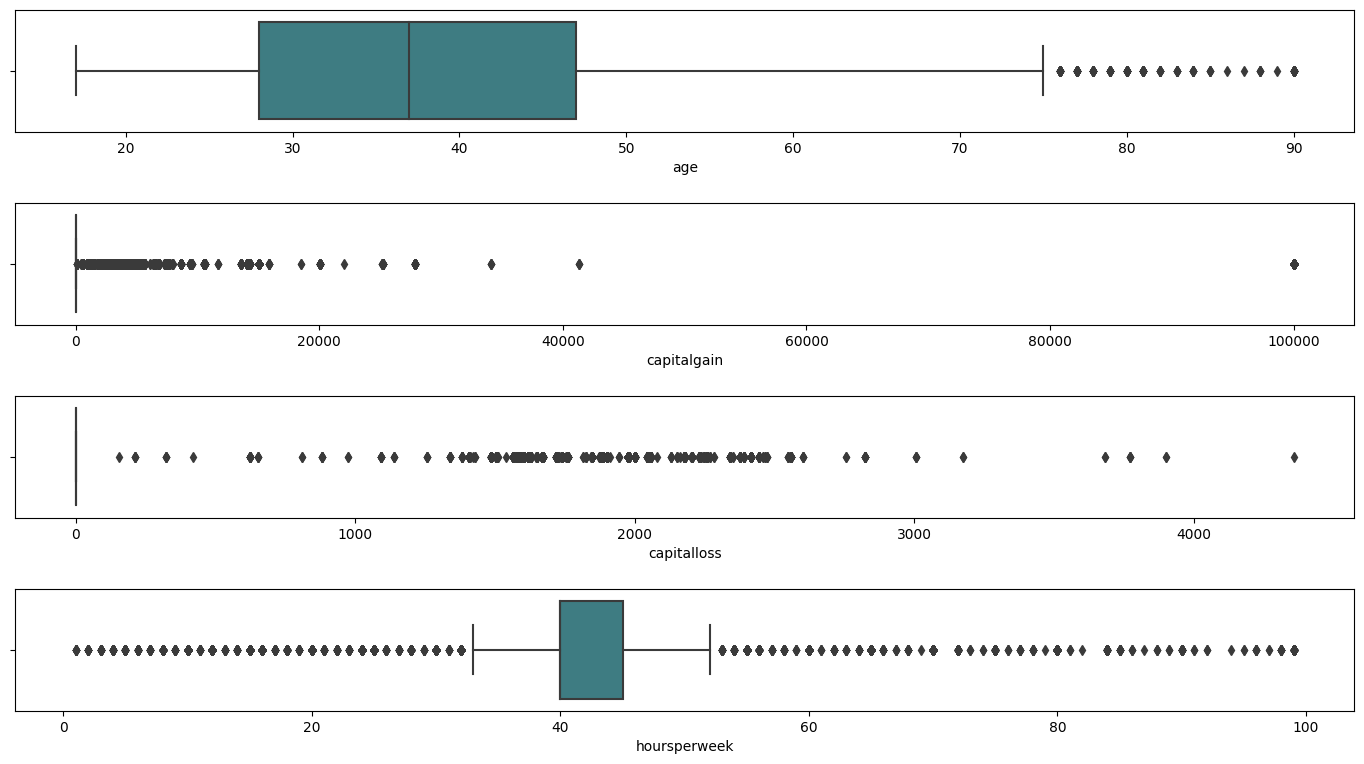

In [23]:
# Outlier Detection
ot=raw_data.copy()
fig, axes=plt.subplots(4,1,figsize=(14,8),sharex=False,sharey=False)
sns.boxplot(x='age',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=ot,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

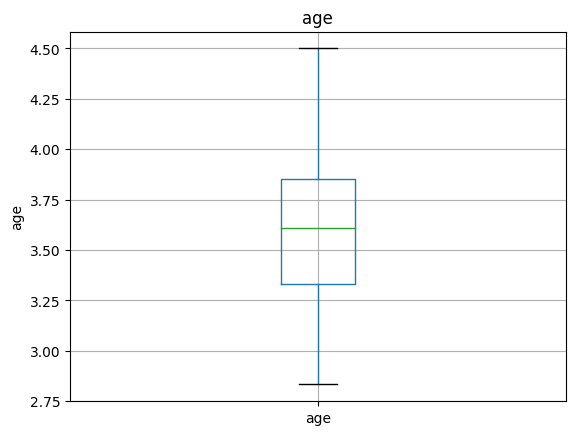

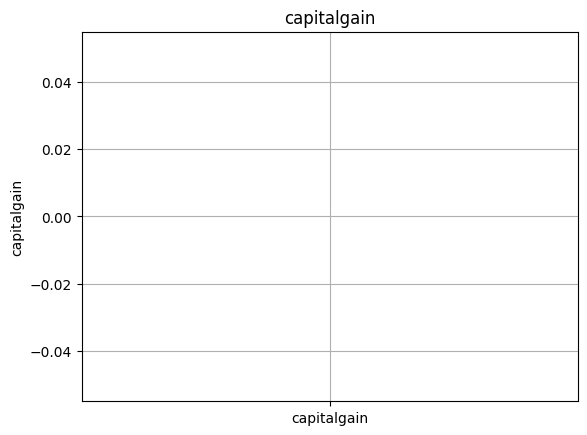

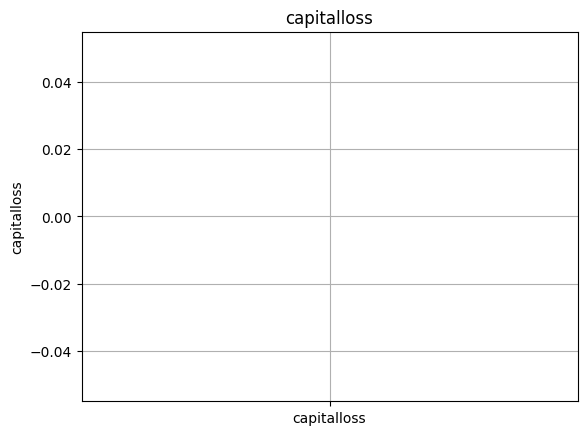

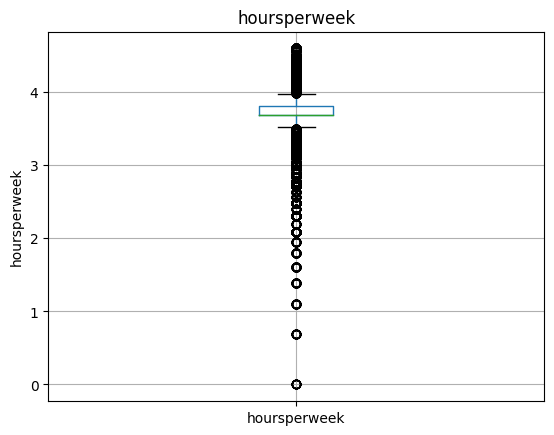

In [24]:
# After the log transformation
for feature in continuous_feature:
    data=raw_data.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

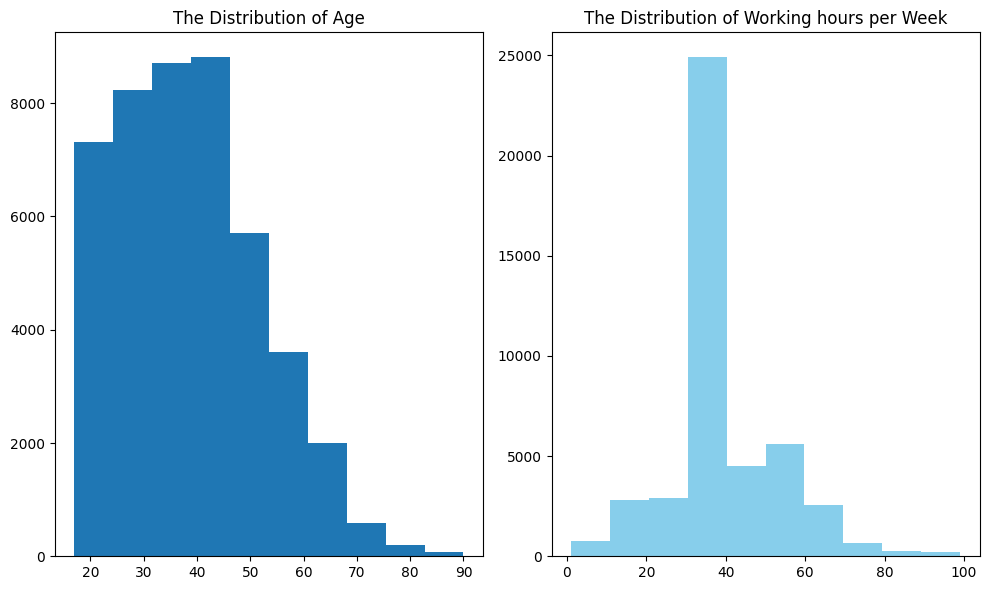

In [25]:
dist_age_balance = plt.figure(figsize = (10,6))

ra1 = dist_age_balance.add_subplot(1,2,1)
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(raw_data['age'])
ra1.set_title('The Distribution of Age')

ra2.hist(raw_data['hoursperweek'], color = 'skyblue')
ra2.set_title('The Distribution of Working hours per Week')

plt.tight_layout()
plt.show()

In [26]:
raw_data[['age','hoursperweek']].describe()

,age,hoursperweek
count,45221.000000,45221.000000
mean,38.548086,40.938038
std,13.217981,12.007640
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,47.000000,45.000000
max,90.000000,99.000000


Text(0.5, 1.0, 'Working Class')

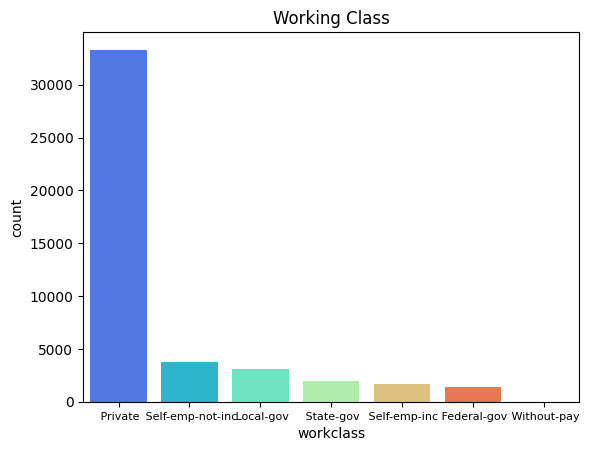

In [27]:
pal = sns.color_palette('rainbow')
sns.countplot(x='workclass', data=raw_data, palette = pal,
              order=raw_data['workclass'].value_counts().index, );
plt.xticks(rotation = 'horizontal',fontsize = 8)
plt.title('Working Class')

Text(0.5, 1.0, 'Marital Status')

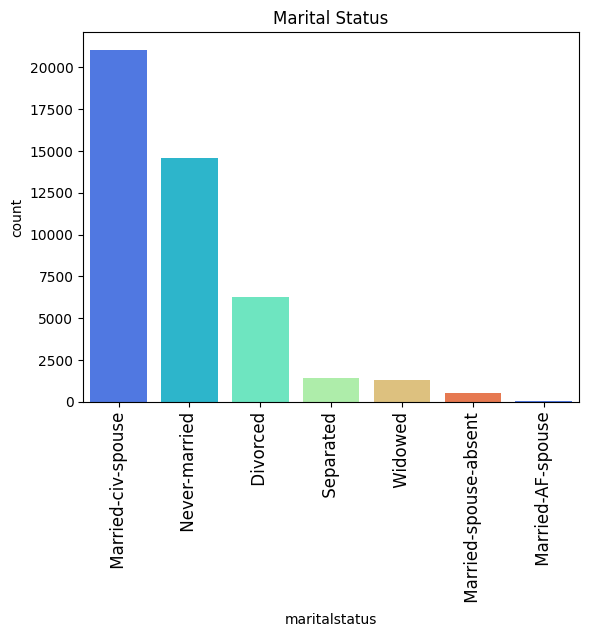

In [28]:
sns.countplot(x='maritalstatus', data=raw_data, palette = pal,
              order=raw_data['maritalstatus'].value_counts().index)
plt.xticks(fontsize = 12,rotation = 90)
plt.title('Marital Status')

Text(0.5, 1.0, 'Education')

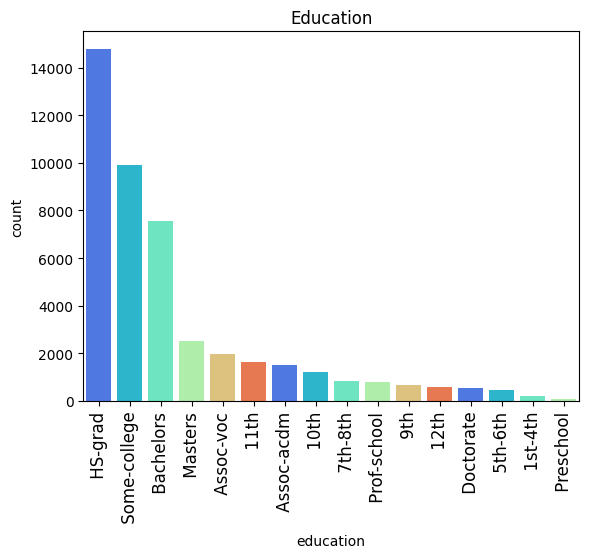

In [29]:
sns.countplot(x='education', data=raw_data, palette = pal,
              order=raw_data['education'].value_counts().index)
plt.xticks(fontsize = 12,rotation = 90)
plt.title('Education')

Text(0.5, 1.0, 'Native')

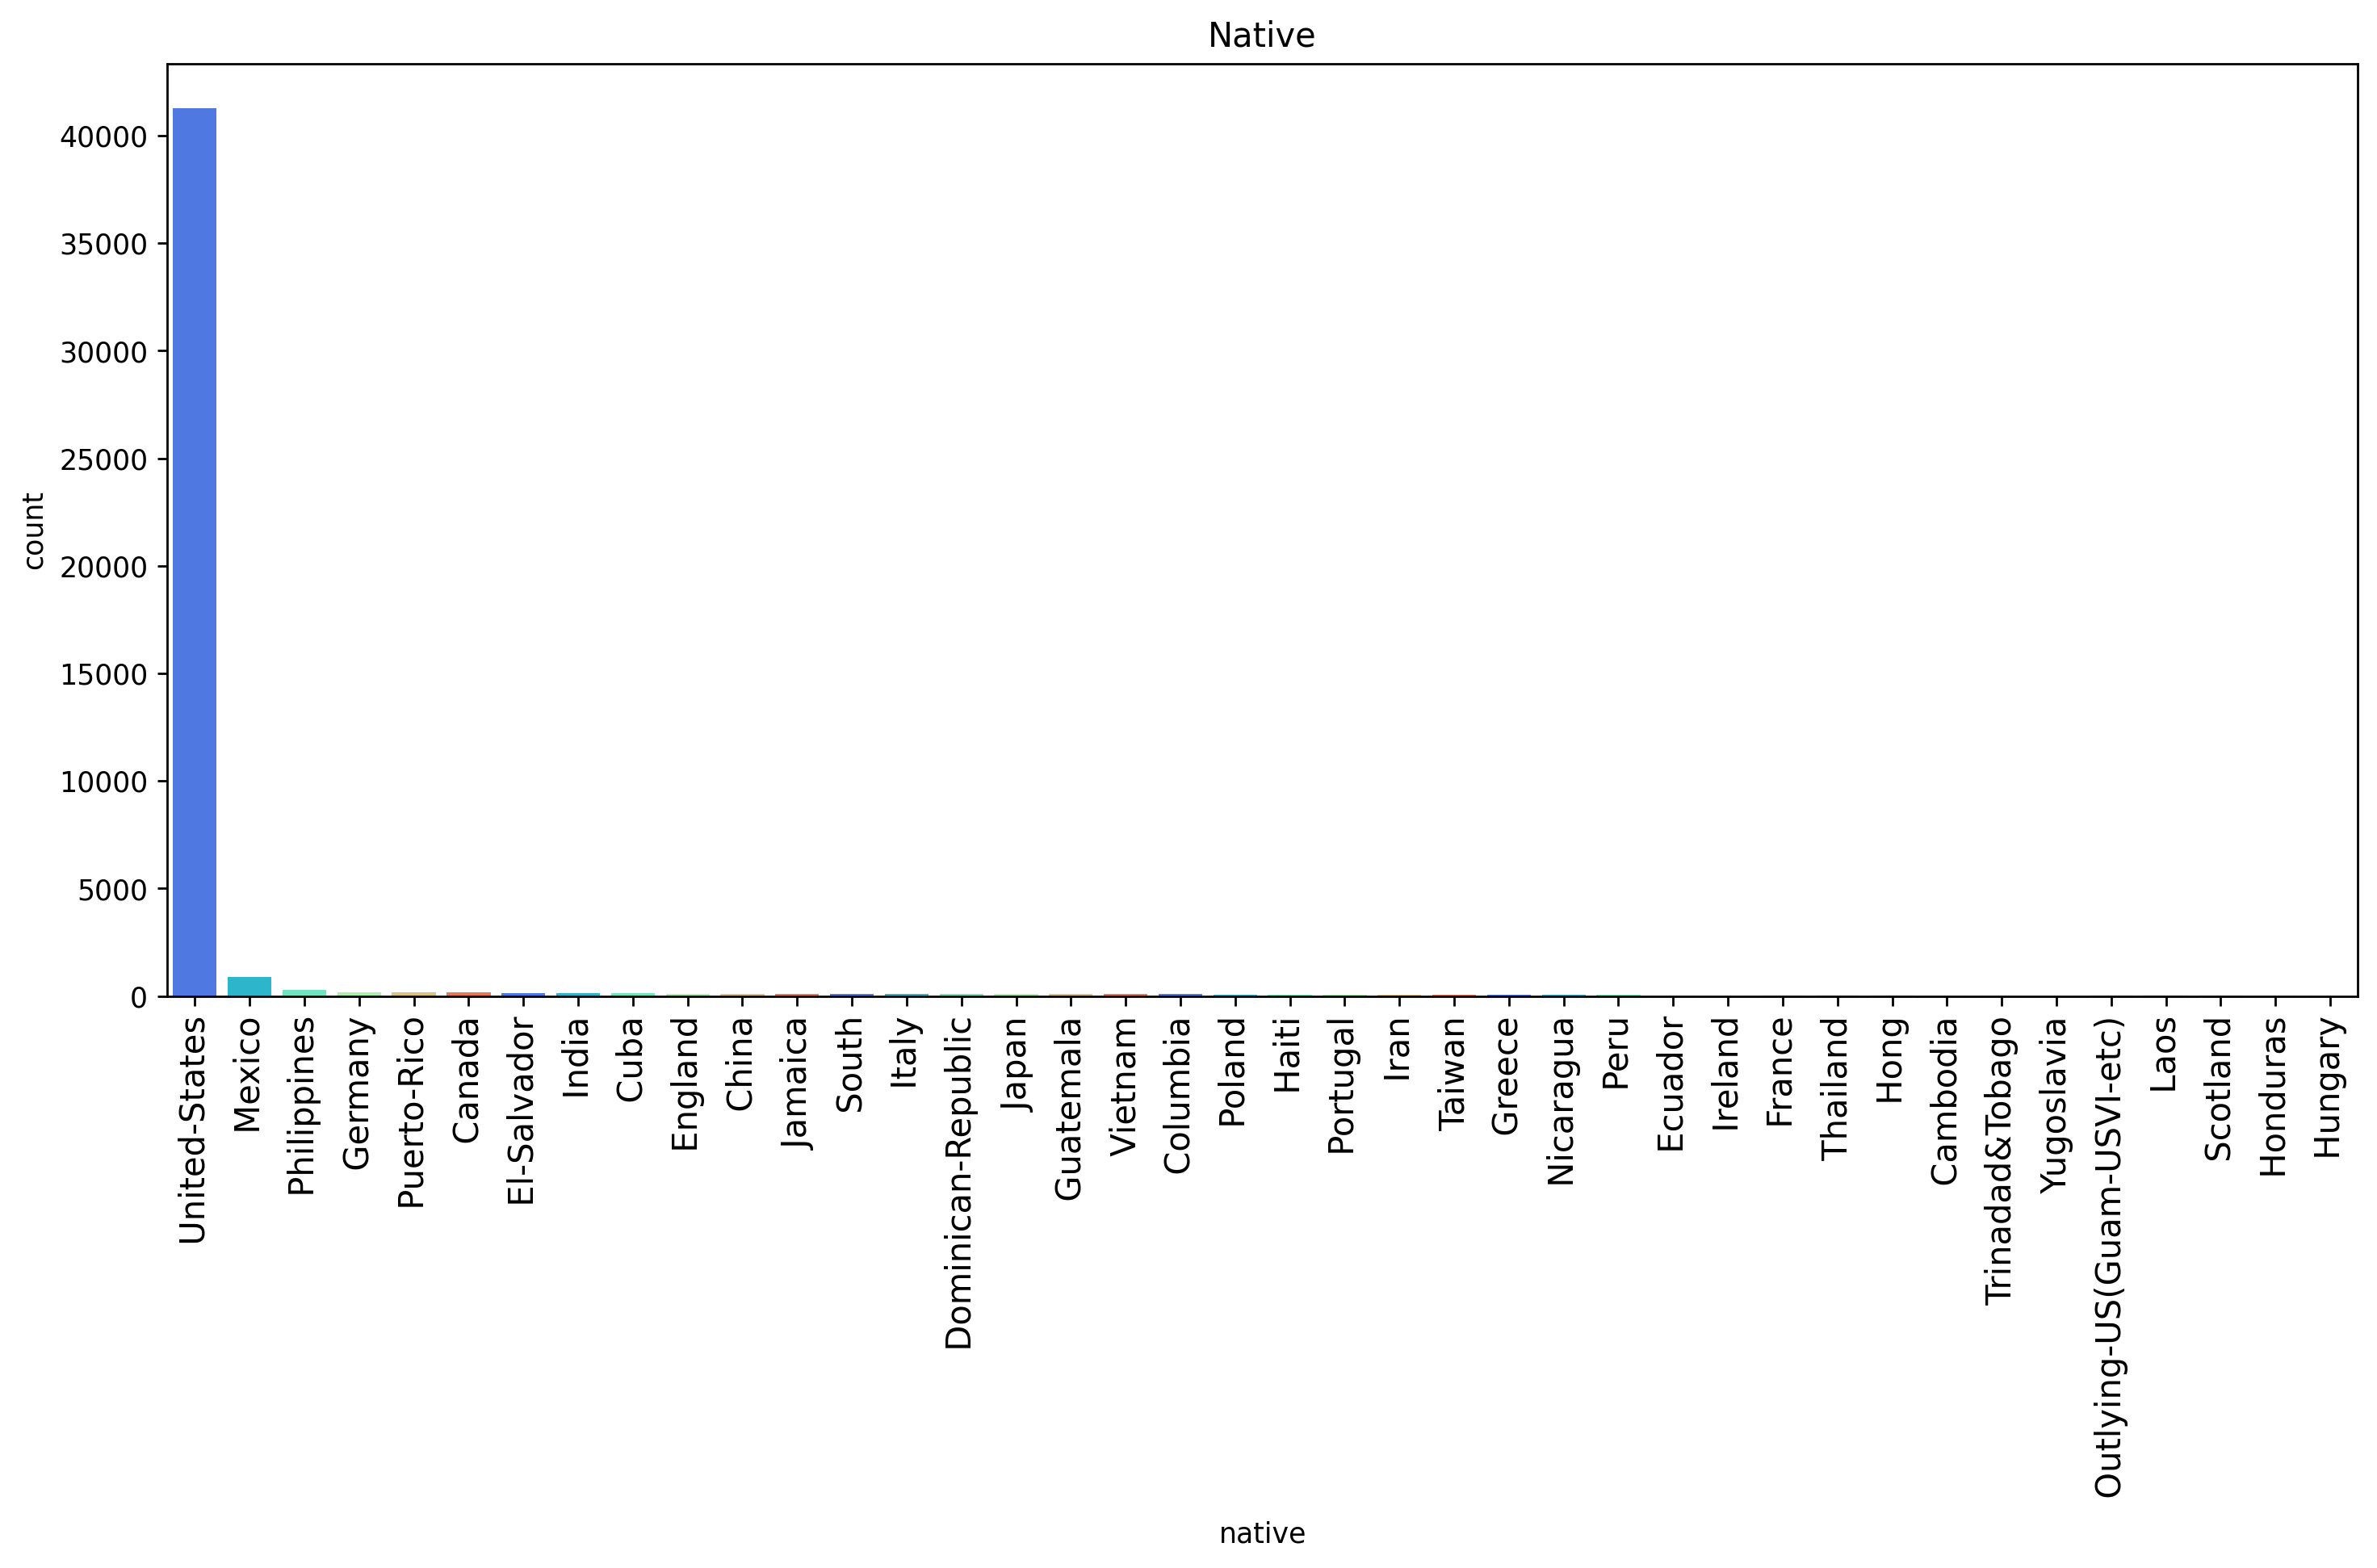

In [30]:
plt.figure(figsize=(14,6),dpi=250)
sns.countplot(x='native', data=raw_data, palette = pal,
              order=raw_data['native'].value_counts().index)
plt.xticks(fontsize = 12,rotation=90)
plt.title('Native')

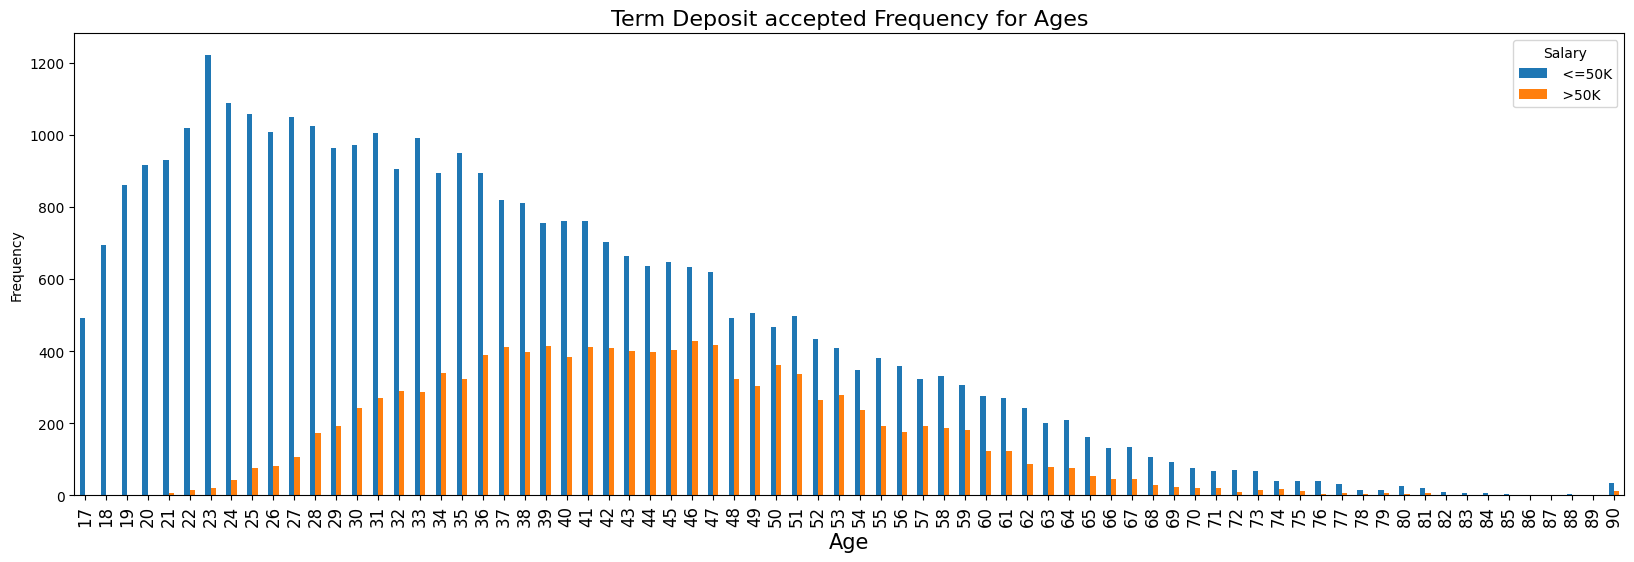

In [31]:
pd.crosstab(raw_data.age,raw_data.Salary).plot(kind="bar",figsize=(20,6))
plt.title('Term Deposit accepted Frequency for Ages', fontsize = 16)
plt.xticks(fontsize = 12)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Frequency')
plt.show()

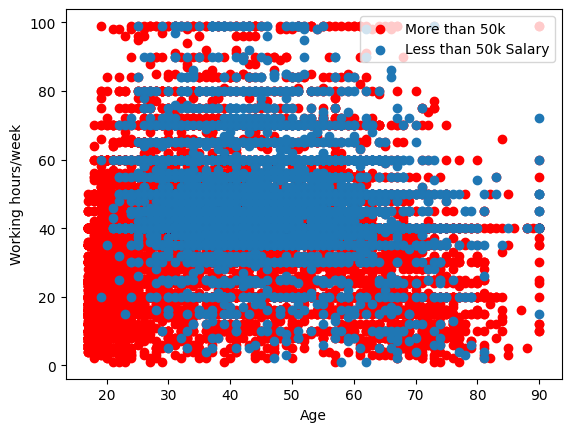

In [32]:
plt.scatter(x=raw_data.age[raw_data.Salary== ' <=50K'], y=raw_data.hoursperweek[(raw_data.Salary== ' <=50K')], c="red")
plt.scatter(x=raw_data.age[raw_data.Salary== ' >50K'], y=raw_data.hoursperweek[(raw_data.Salary== ' >50K')])
plt.legend(["More than 50k", "Less than 50k Salary"])
plt.xlabel("Age")
plt.ylabel("Working hours/week")
plt.show()

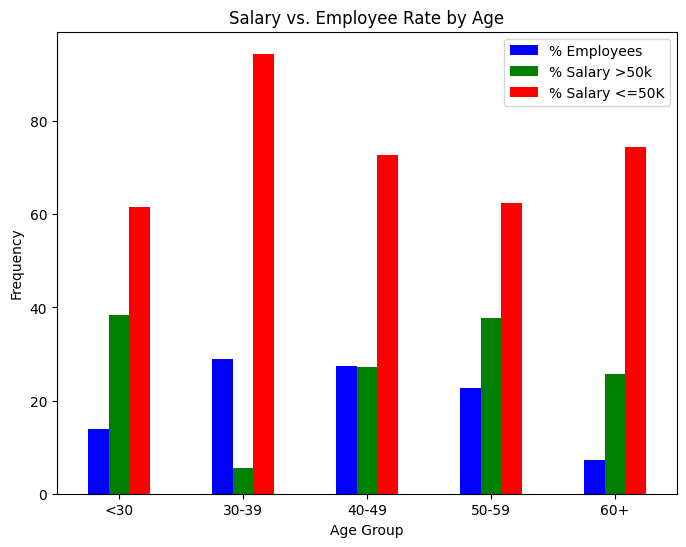

In [33]:
lst = [raw_data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

count_age_response_pct = pd.crosstab(raw_data['Salary'],raw_data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose()

age = pd.DataFrame(raw_data['age_group'].value_counts())
age['% Employees'] = age['age_group']*100/age['age_group'].sum()
age['% Salary >50k'] = count_age_response_pct[' >50K']
age['% Salary <=50K'] = count_age_response_pct[' <=50K']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age = age[['% Employees','% Salary >50k','% Salary <=50K']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('blue','green','red'))
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Salary vs. Employee Rate by Age')
plt.show()

In [34]:
raw_data.hoursperweek.describe()

count    45221.000000
mean        40.938038
std         12.007640
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hoursperweek, dtype: float64

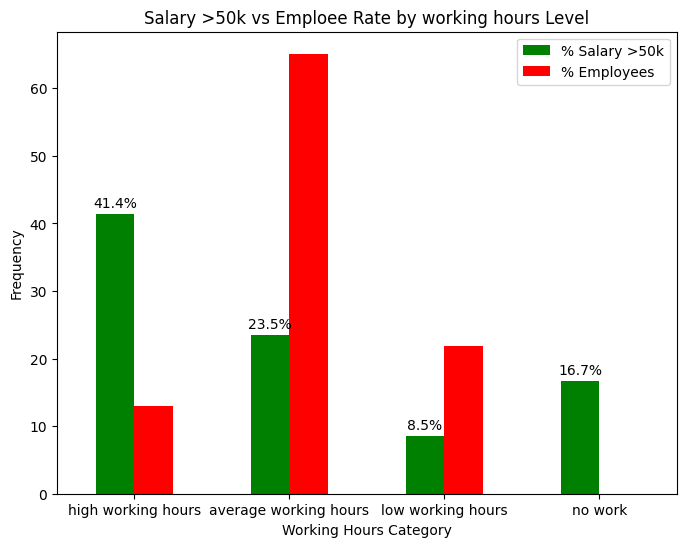

In [35]:
lst = [raw_data]
for column in lst:
    column.loc[column["hoursperweek"] <= 1,  'hour_group'] = 'no work'
    column.loc[(column["hoursperweek"] > 1) & (column["hoursperweek"] <= 35), 'hour_group'] = 'low working hours'
    column.loc[(column["hoursperweek"] > 35) & (column["hoursperweek"] <= 45), 'hour_group'] = 'average working hours'
    column.loc[(column["hoursperweek"] > 50), 'hour_group'] = 'high working hours'

count_balance_response_pct = pd.crosstab(raw_data['Salary'],raw_data['hour_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

bal = pd.DataFrame(raw_data['hour_group'].value_counts())
bal['% Employees'] = bal['hour_group']*100/bal['hour_group'].sum()
bal['% Salary >50k'] = count_balance_response_pct[' >50K']
bal.drop('hour_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)

plot_balance = bal[['% Salary >50k','% Employees']].plot(kind = 'bar',
                                               color = ('green','red'),
                                               figsize = (8,6))

plt.title('Salary >50k vs Emploee Rate by working hours Level')
plt.ylabel('Frequency')
plt.xlabel('Working Hours Category')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      bal['% Salary >50k'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2,
                      rec.get_height() + 1,
                      label+'%',
                      ha = 'center',
                      color = 'black')

In [36]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
df= raw_data.copy()
label_encoder = preprocessing.LabelEncoder()
df["education"]=label_encoder.fit_transform(df["education"])
df["workclass"]=label_encoder.fit_transform(df["workclass"])
df["maritalstatus"]=label_encoder.fit_transform(df["maritalstatus"])
df["sex"]=label_encoder.fit_transform(df["sex"])
df["race"]=label_encoder.fit_transform(df["race"])
df["occupation"]=label_encoder.fit_transform(df["occupation"])
df["relationship"]=label_encoder.fit_transform(df["relationship"])
df["native"]=label_encoder.fit_transform(df["native"])
df.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,age_group,hour_group
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K,30.0,average working hours
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K,50.0,low working hours
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K,30.0,average working hours
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K,50.0,average working hours
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K,20.0,average working hours
5,37,2,12,14,2,3,5,4,0,0,0,40,37,<=50K,30.0,average working hours
6,49,2,6,5,3,7,1,2,0,0,0,16,21,<=50K,40.0,low working hours
7,52,4,11,9,2,3,0,4,1,0,0,45,37,>50K,50.0,average working hours
8,31,2,12,14,4,9,1,4,0,14084,0,50,37,>50K,30.0,NaN
9,42,2,9,13,2,3,0,4,1,5178,0,40,37,>50K,40.0,average working hours


In [37]:
df['Salary'] = raw_data.Salary
df['Salary'] = np.where(df['Salary'].str.contains(" >50K"), 1, 0)
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,age_group,hour_group
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0,30.0,average working hours
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0,50.0,low working hours
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0,30.0,average working hours
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0,50.0,average working hours
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0,20.0,average working hours


In [38]:
df[continuous_feature]

,age,capitalgain,capitalloss,hoursperweek
0,39,2174,0,40
1,50,0,0,13
2,38,0,0,40
3,53,0,0,40
4,28,0,0,40
...,...,...,...,...
45216,33,0,0,40
45217,39,0,0,36
45218,38,0,0,50
45219,44,5455,0,40


In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = df[continuous_feature]
df[continuous_feature] = scaler.fit_transform(features.values)
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,age_group,hour_group
0,0.034190,5,9,13,4,0,1,4,1,0.142884,-0.218728,-0.078121,37,0,30.0,average working hours
1,0.866399,4,9,13,2,3,0,4,1,-0.146735,-0.218728,-2.326714,37,0,50.0,low working hours
2,-0.041466,2,11,9,0,5,1,4,1,-0.146735,-0.218728,-0.078121,37,0,30.0,average working hours
3,1.093365,2,1,7,2,5,0,2,1,-0.146735,-0.218728,-0.078121,37,0,50.0,average working hours
4,-0.798019,2,9,13,2,9,5,2,0,-0.146735,-0.218728,-0.078121,4,0,20.0,average working hours


In [40]:
x = df.drop('Salary',axis=1)
y = df['Salary']

In [41]:
y.unique()

array([0, 1])

In [42]:
from sklearn.model_selection import KFold , GridSearchCV, train_test_split, StratifiedKFold, RandomizedSearchCV

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [44]:
# summarize train and test composition
counter_train = Counter(y_train)
counter_test = Counter(y_test)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({0: 23809, 1: 7845}) Testing Data Counter({0: 10204, 1: 3363})


In [45]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (31654, 15)
Shape of X_test:  (13567, 15)
Shape of y_train:  (31654,)
Shape of y_test (13567,)


###  Grid search using Train Test Splits Stratifying Target feature on Imbalanced Dataset

In [46]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

# Run the SVM with default hyperparameters

In [ ]:
rf_clf = SVC()
rf_clf.fit(x_train, y_train)
print_score(rf_clf, x_train, y_train, x_test, y_test, train=True)
print_score(rf_clf, x_train, y_train, x_test, y_test, train=False)